# 2019 Canadian Election tweets
# OSEMN Step 4: Model
# Sentiment analysis of Sentiment 140 dataset
# Hyperparameter tuning: interpretation of grid search results

This notebook describes part of Step 4: Explore of OSEMN methodology.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from glob import glob

sns.set()

In [2]:
gs_results_dir = 'results/gs_results/'
os.listdir(gs_results_dir)

['gs_lr.csv',
 'gs_complnb.csv',
 'gs_lsvc.csv',
 'gs_multinb.csv',
 'gs_tree.csv',
 '.ipynb_checkpoints']

In [10]:
gs_results = glob(gs_results_dir + '*.csv')
gs_results

['results/gs_results/gs_lr.csv',
 'results/gs_results/gs_complnb.csv',
 'results/gs_results/gs_lsvc.csv',
 'results/gs_results/gs_multinb.csv',
 'results/gs_results/gs_tree.csv']

## Load grid search results

In [3]:
def read_gs_results(file_path, model_name):
    gs_results = pd.read_csv(file_path)
    mask1 = gs_results['param_vect__stop_words'].notnull()
    gs_results.loc[mask1, 'param_vect__stop_words'] = True
    gs_results.loc[~mask1, 'param_vect__stop_words'] = False
    gs_results['param_vect__use_idf'] = gs_results['param_vect__use_idf'].fillna(True)
    gs_results['param_vect__tokenizer'] = \
        gs_results['param_vect__tokenizer']\
                    .str.replace('<function tokenizer at 0x7f58155cf7a0>', 'tokenizer')\
                    .str.replace('<function tokenizer_porter at 0x7f58155cfef0>', 'porter')\
                    .str.replace('<function tokenizer_snowball at 0x7f582b037560>', 'snowball')\
                    .str.replace('<function tokenizer_lancaster at 0x7f582b037b90>', 'lancaster')
    gs_results.insert(0, 'model', model_name)
    print("DataFrame read, {0} rows, {1} columns".format(gs_results.shape[0], gs_results.shape[1]))
    return gs_results

In [25]:
df = pd.DataFrame()
for i in range(len(gs_results)):
    model_name = gs_results[i].split('_')[-1].split('.')[0]
    gs_res = read_gs_results(gs_results[i], model_name)
    df = df.append(gs_res)
print("----- DataFrame with grid search results created"
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(df.shape[0], df.shape[1]) +
      "\n-- Column names:\n", df.columns)

DataFrame read, 96 rows, 21 columns
DataFrame read, 96 rows, 21 columns
DataFrame read, 96 rows, 21 columns
DataFrame read, 96 rows, 21 columns
DataFrame read, 96 rows, 21 columns
----- DataFrame with grid search results created
with 480 rows
and 21 columns
-- Column names:
 Index(['model', 'mean_fit_time', 'std_fit_time', 'mean_score_time',
       'std_score_time', 'param_vect__binary', 'param_vect__ngram_range',
       'param_vect__norm', 'param_vect__smooth_idf', 'param_vect__stop_words',
       'param_vect__tokenizer', 'param_vect__use_idf', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


In [26]:
df['model'].value_counts()

lsvc       96
complnb    96
tree       96
multinb    96
lr         96
Name: model, dtype: int64

## Interpret grid search results

### Model fit time (min)

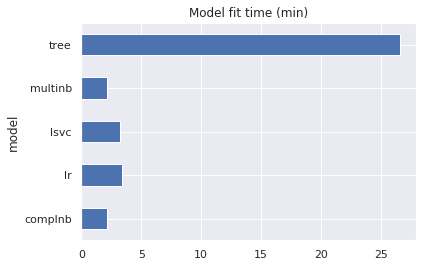

In [28]:
df.groupby('model')['mean_fit_time'].min().plot(kind='barh', title='Model fit time (min)');

### Model test score (max)

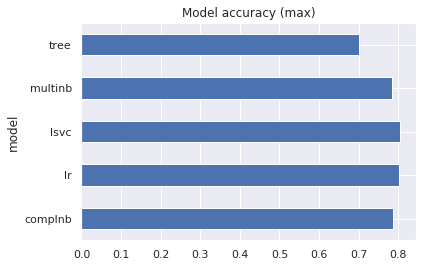

In [29]:
df.groupby('model')['mean_test_score'].max().plot(kind='barh', title='Model accuracy (max)');

### Vectorization parameters

#### Stop words
Stop words do not appear to improve neither accuracy nor fit times.

##### Fit time

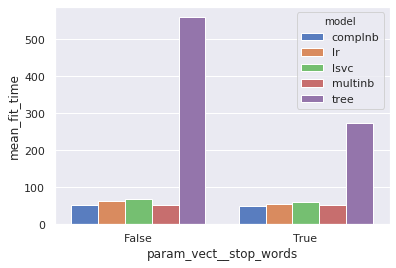

In [30]:
param = 'param_vect__stop_words'
stat = 'mean_fit_time'
s = df.groupby([param, 'model'])[stat].mean().reset_index()
sns.barplot(x=param, y=stat, hue="model", data=s, palette="muted");

##### Accuracy

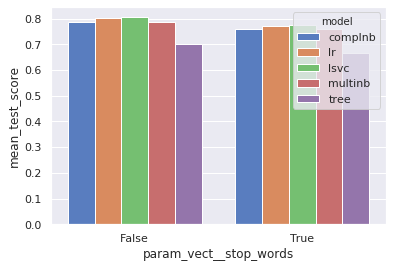

In [31]:
param = 'param_vect__stop_words'
stat = 'mean_test_score'
s = df.groupby([param, 'model'])[stat].max().reset_index()
sns.barplot(x=param, y=stat, hue="model", data=s, palette="muted");

#### n-gram range
Another test for ngram range (1, 2) needs to be repeated.

##### Fit time

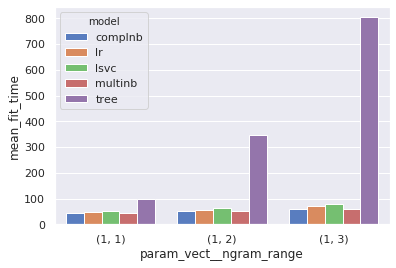

In [32]:
param = 'param_vect__ngram_range'
stat = 'mean_fit_time'
s = df.groupby([param, 'model'])[stat].mean().reset_index()
sns.barplot(x=param, y=stat, hue="model", data=s, palette="muted");

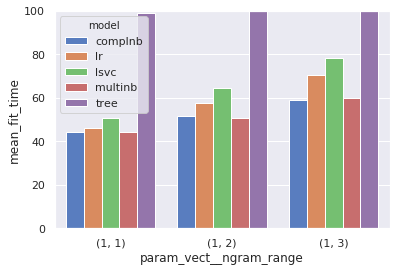

In [47]:
param = 'param_vect__ngram_range'
stat = 'mean_fit_time'
s = df.groupby([param, 'model'])[stat].mean().reset_index()
sns.barplot(x=param, y=stat, hue="model", data=s, palette="muted")
plt.ylim(0, 100);

##### Accuracy

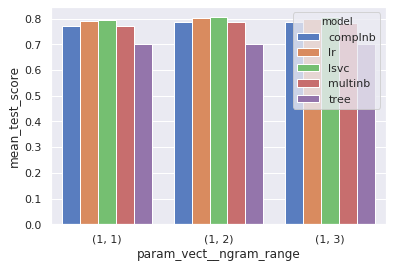

In [33]:
param = 'param_vect__ngram_range'
stat = 'mean_test_score'
s = df.groupby([param, 'model'])[stat].max().reset_index()
sns.barplot(x=param, y=stat, hue="model", data=s, palette="muted");

#### Tokenizer
Use of stemmers results in slower fit times while not improving model accuracy.

##### Fit time

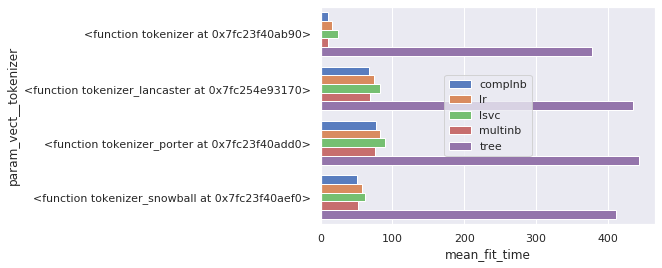

In [39]:
param = 'param_vect__tokenizer'
stat = 'mean_fit_time'
s = df.groupby([param, 'model'])[stat].mean().reset_index()
sns.barplot(y=param, x=stat, hue="model", data=s, palette="muted")
plt.legend(loc='center');

##### Accuracy

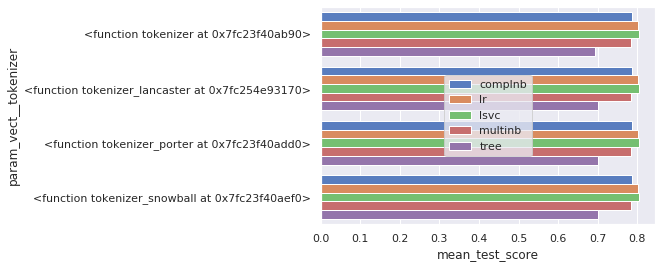

In [38]:
param = 'param_vect__tokenizer'
stat = 'mean_test_score'
s = df.groupby([param, 'model'])[stat].max().reset_index()
sns.barplot(y=param, x=stat, hue="model", data=s, palette="muted")
plt.legend(loc='center');

#### Use IDF


##### Fit time

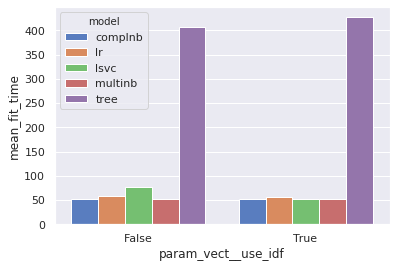

In [40]:
param = 'param_vect__use_idf'
stat = 'mean_fit_time'
s = df.groupby([param, 'model'])[stat].mean().reset_index()
sns.barplot(x=param, y=stat, hue="model", data=s, palette="muted");

##### Accuracy

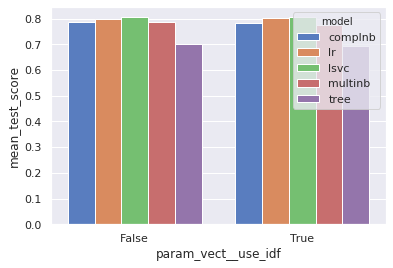

In [41]:
param = 'param_vect__use_idf'
stat = 'mean_test_score'
s = df.groupby([param, 'model'])[stat].max().reset_index()
sns.barplot(x=param, y=stat, hue="model", data=s, palette="muted");

#### Binary

##### Fit time

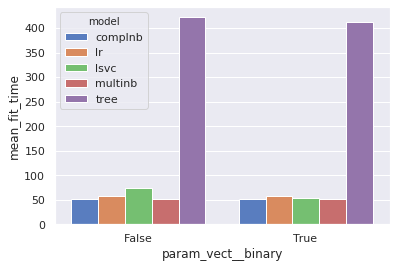

In [43]:
param = 'param_vect__binary'
stat = 'mean_fit_time'
s = df.groupby([param, 'model'])[stat].mean().reset_index()
sns.barplot(x=param, y=stat, hue="model", data=s, palette="muted");

##### Accuracy

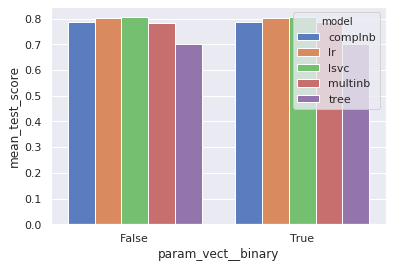

In [44]:
param = 'param_vect__binary'
stat = 'mean_test_score'
s = df.groupby([param, 'model'])[stat].max().reset_index()
sns.barplot(x=param, y=stat, hue="model", data=s, palette="muted");